**Importing Necessary Liabraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sklearn
import sklearn
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving water_quality_.csv to water_quality_.csv


**Reading File**

In [ ]:
data=pd.read_csv('water_quality_.csv')

In [ ]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Trihalomethanes,Turbidity,Check
0,NaN,204.890456,20791.31898,7.300212,368.516441,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,11.168946,77.488213,4.708658,1


**Visualization of Features and their Relations**

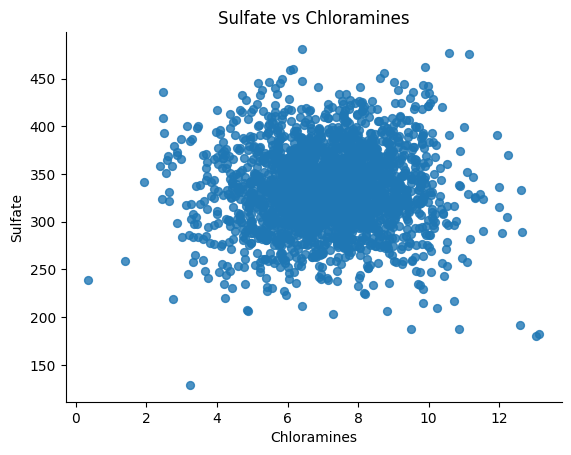

In [ ]:
data.plot(kind='scatter', x='Chloramines', y='Sulfate', s=32, alpha=.8,title='Sulfate vs Chloramines')
plt.gca().spines[['top', 'right',]].set_visible(False)

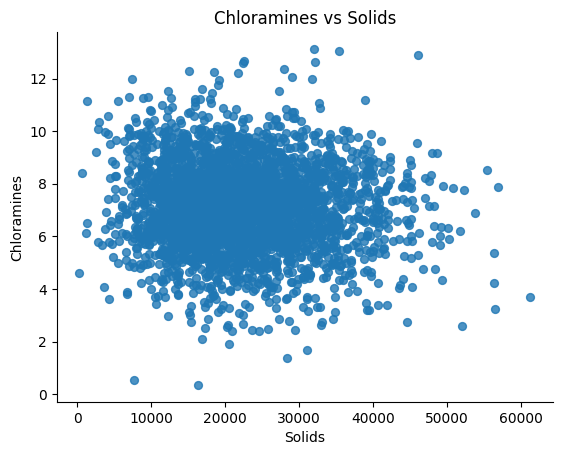

In [ ]:
data.plot(kind='scatter', x='Solids', y='Chloramines', s=32, alpha=.8,title='Chloramines vs Solids')
plt.gca().spines[['top', 'right',]].set_visible(False)

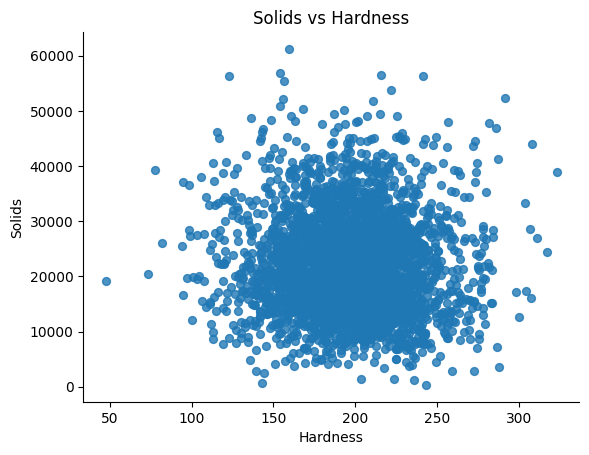

In [ ]:
data.plot(kind='scatter', x='Hardness', y='Solids', s=32, alpha=.8,title='Solids vs Hardness')
plt.gca().spines[['top', 'right',]].set_visible(False)

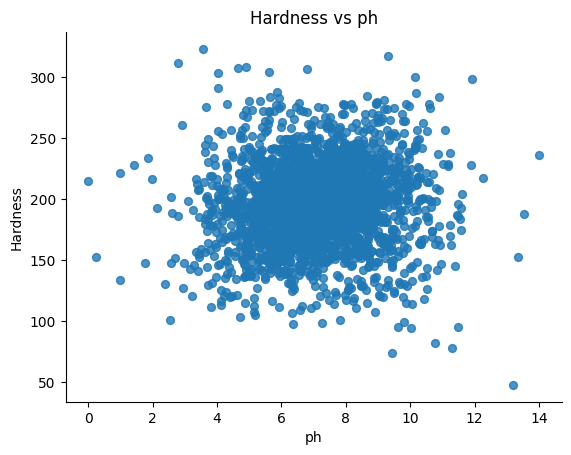

In [ ]:
data.plot(kind='scatter', x='ph', y='Hardness', s=32, alpha=.8,title='Hardness vs ph')
plt.gca().spines[['top', 'right',]].set_visible(False)

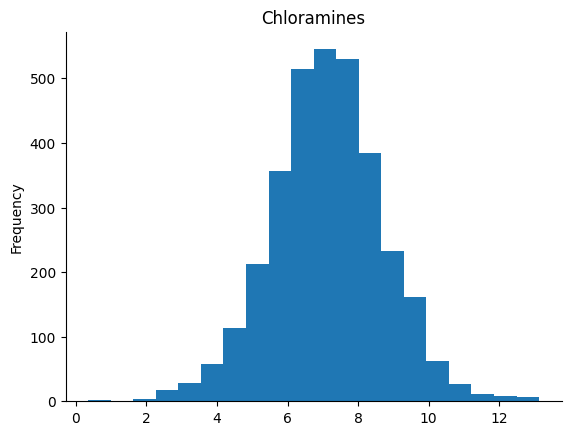

In [ ]:
data['Chloramines'].plot(kind='hist', bins=20, title='Chloramines')
plt.gca().spines[['top', 'right',]].set_visible(False)

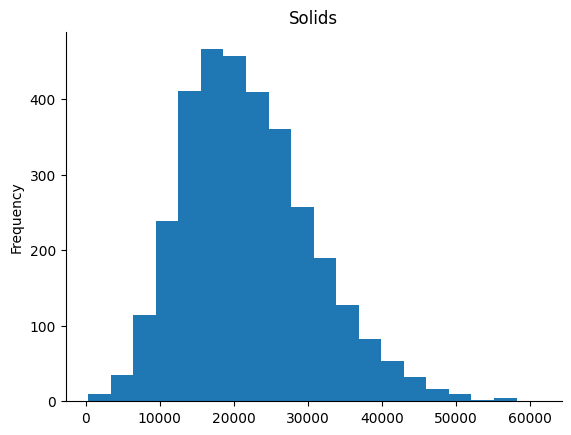

In [ ]:
data['Solids'].plot(kind='hist', bins=20, title='Solids')
plt.gca().spines[['top', 'right',]].set_visible(False)

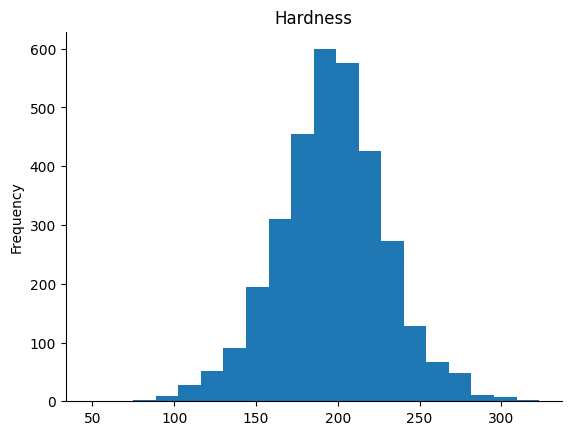

In [ ]:
data['Hardness'].plot(kind='hist', bins=20, title='Hardness')
plt.gca().spines[['top', 'right',]].set_visible(False)

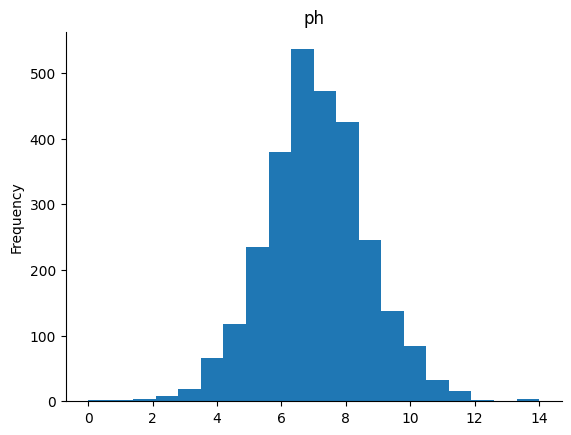

In [ ]:
data['ph'].plot(kind='hist', bins=20, title='ph')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Exploratory Data Analysis**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Organic_carbon   3276 non-null   float64
 6   Trihalomethanes  3114 non-null   float64
 7   Turbidity        3276 non-null   float64
 8   Check            3276 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 230.5 KB


In [ ]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Check                0
dtype: int64

In [ ]:
data1=data.copy()
data1.fillna(data1.mean(),inplace=True)

In [ ]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Organic_carbon   3276 non-null   float64
 6   Trihalomethanes  3276 non-null   float64
 7   Turbidity        3276 non-null   float64
 8   Check            3276 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 230.5 KB


In [ ]:
data2=data.copy()
data2=data2.interpolate()

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3275 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Organic_carbon   3276 non-null   float64
 6   Trihalomethanes  3276 non-null   float64
 7   Turbidity        3276 non-null   float64
 8   Check            3276 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 230.5 KB


In [ ]:
knn_imp = KNNImputer(n_neighbors=5)
data3 = data.copy()
data3 = pd.DataFrame(knn_imp.fit_transform(data3), columns=data3.columns)

In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Organic_carbon   3276 non-null   float64
 6   Trihalomethanes  3276 non-null   float64
 7   Turbidity        3276 non-null   float64
 8   Check            3276 non-null   float64
dtypes: float64(9)
memory usage: 230.5 KB


<Axes: ylabel='ph'>

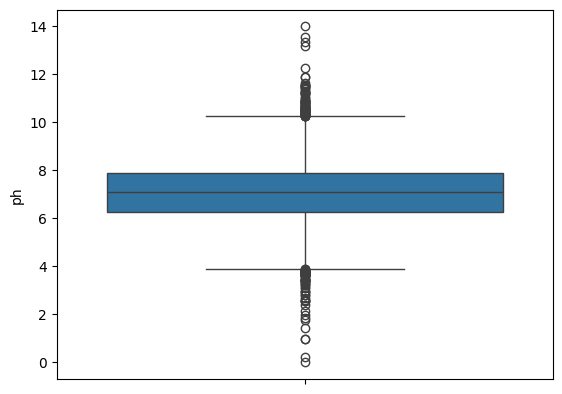

In [ ]:
sns.boxplot(y=data1['ph'])

<Axes: ylabel='ph'>

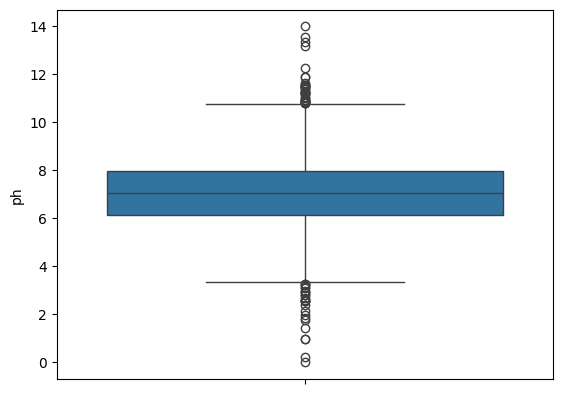

In [ ]:
sns.boxplot(y=data2['ph'])

<Axes: ylabel='ph'>

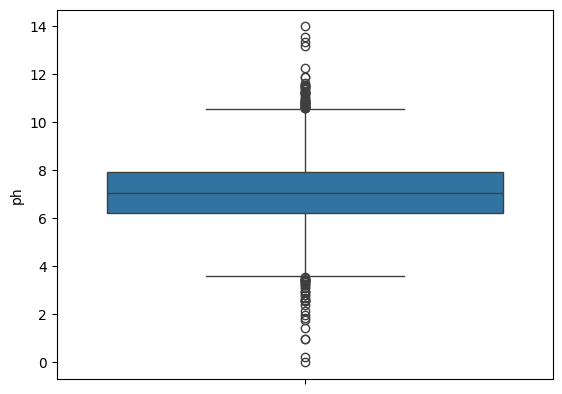

In [ ]:
sns.boxplot(y=data3['ph'])

In [ ]:
data1.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Trihalomethanes,Turbidity,Check
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690300,6.127421,317.094638,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833605,7.130299,333.775777,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762125,8.114887,350.385756,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,28.300000,124.000000,6.739000,1.000000


In [ ]:
data2.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Trihalomethanes,Turbidity,Check
count,3275.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.070022,196.369496,22014.092526,7.122277,333.741509,14.284970,66.461927,3.966786,0.390110
std,1.533502,32.879761,8768.570828,1.583085,38.870128,3.308162,15.980497,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,2.200000,0.738000,1.450000,0.000000
25%,6.120033,176.850538,15666.690300,6.127421,310.174409,12.065801,55.988340,3.439711,0.000000
50%,7.035037,196.967627,20927.833605,7.130299,332.960442,14.218338,66.691179,3.955028,0.000000
75%,7.992174,216.667456,27332.762125,8.114887,357.388145,16.557652,77.215957,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,28.300000,124.000000,6.739000,1.000000


In [ ]:
data3.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Trihalomethanes,Turbidity,Check
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.077708,196.369496,22014.092526,7.122277,333.584345,14.284970,66.390895,3.966786,0.390110
std,1.496418,32.879761,8768.570828,1.583085,37.414765,3.308162,15.864305,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,2.200000,0.738000,1.450000,0.000000
25%,6.202681,176.850538,15666.690300,6.127421,312.218613,12.065801,56.352239,3.439711,0.000000
50%,7.035894,196.967627,20927.833605,7.130299,333.280293,14.218338,66.639068,3.955028,0.000000
75%,7.950975,216.667456,27332.762125,8.114887,354.291167,16.557652,77.006325,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,28.300000,124.000000,6.739000,1.000000


In [ ]:
data1.skew()

ph                 0.027796
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.041184
Organic_carbon     0.025533
Trihalomethanes   -0.085161
Turbidity         -0.007817
Check              0.450784
dtype: float64

In [ ]:
data2.skew()

ph                 0.035055
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.028956
Organic_carbon     0.025533
Trihalomethanes   -0.088248
Turbidity         -0.007817
Check              0.450784
dtype: float64

In [ ]:
data3.skew()

ph                 0.033390
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.034951
Organic_carbon     0.025533
Trihalomethanes   -0.084031
Turbidity         -0.007817
Check              0.450784
dtype: float64

In [ ]:
data4=data.copy()

In [ ]:
data4['ph'].fillna(data4['ph'].mean(),inplace=True)

In [ ]:
data4['Sulfate']=data4['Sulfate'].interpolate()

In [ ]:
data4 = pd.DataFrame(knn_imp.fit_transform(data4), columns=data4.columns)
data4.skew()

ph                 0.027796
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.028956
Organic_carbon     0.025533
Trihalomethanes   -0.081948
Turbidity         -0.007817
Check              0.450784
dtype: float64

**Handling Outliers**

In [ ]:
#winsorization to handle outliers
from scipy.stats.mstats import winsorize

<Axes: ylabel='Solids'>

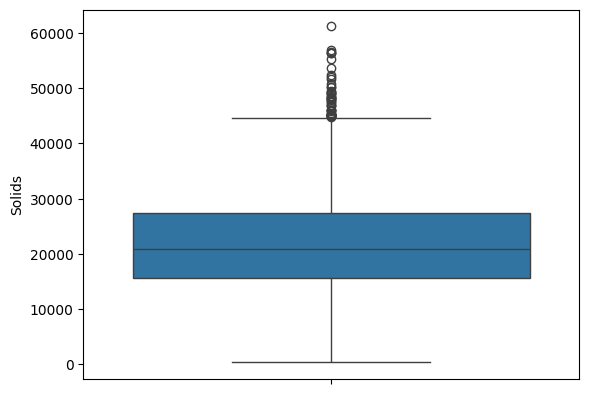

In [ ]:
sns.boxplot(y = data4['Solids'])

In [ ]:
data5 = data4.copy()
data5['Solids'] = winsorize(data4['Solids'], limits = [0.00, 0.02])

<Axes: ylabel='Solids'>

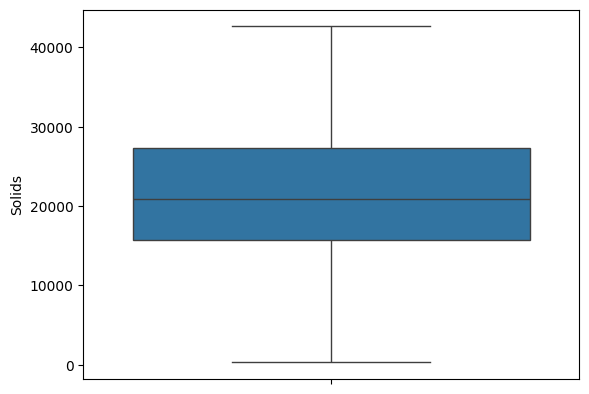

In [ ]:
sns.boxplot(y = data5['Solids'])

In [ ]:
data5['Solids'].skew()

0.4242323281765673

<Axes: ylabel='ph'>

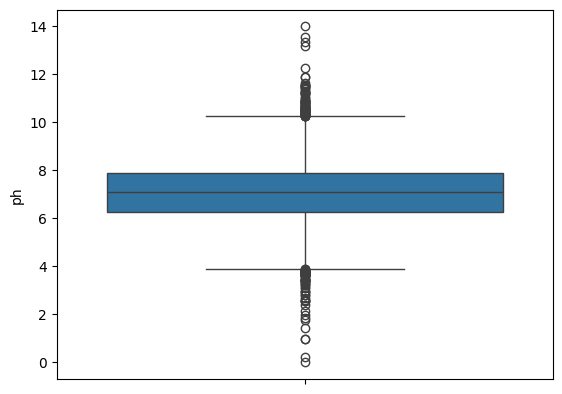

In [ ]:
sns.boxplot(y=data4['ph'])

In [ ]:
data5['ph'] = winsorize(data5['ph'], limits = [0.03,0.03])

<Axes: ylabel='ph'>

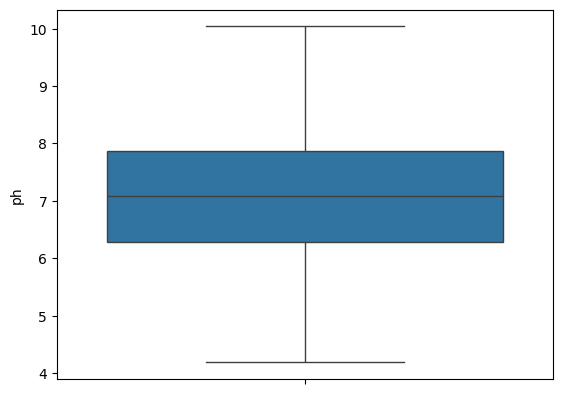

In [ ]:
sns.boxplot(y=data5['ph'])

<Axes: ylabel='Hardness'>

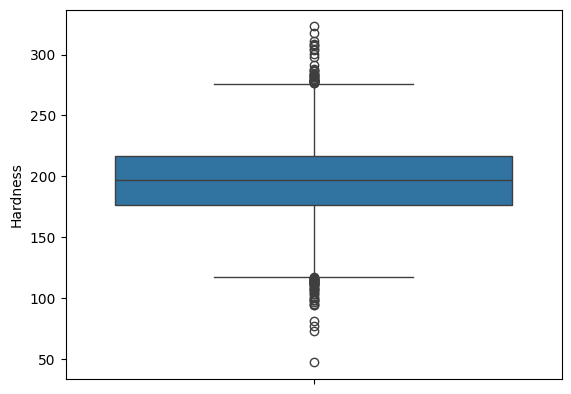

In [ ]:
sns.boxplot(y=data4['Hardness'])

In [ ]:
data5['Hardness'] = winsorize(data5['Hardness'], limits = [0.03, 0.03])

<Axes: ylabel='Hardness'>

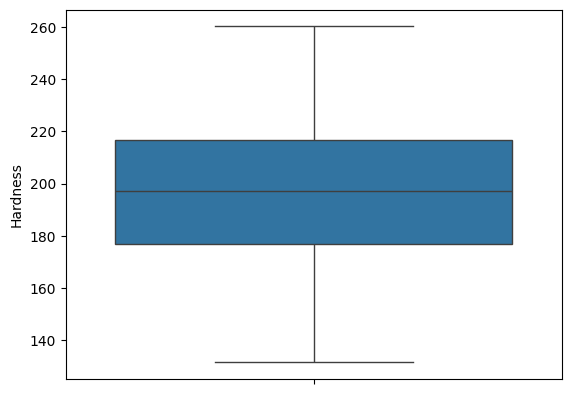

In [ ]:
sns.boxplot(y=data5['Hardness'])

<Axes: ylabel='Chloramines'>

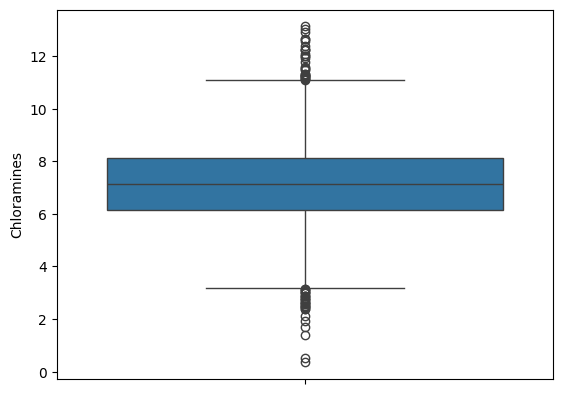

In [ ]:
sns.boxplot(y=data4['Chloramines'])

<Axes: ylabel='Chloramines'>

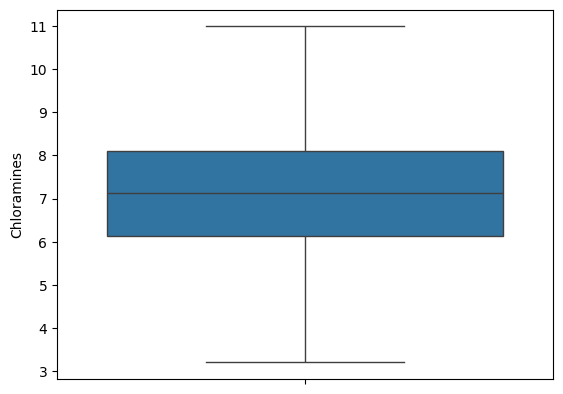

In [ ]:
data5['Chloramines'] = winsorize(data5['Chloramines'], limits = [0.01, 0.01])
sns.boxplot(y=data5['Chloramines'])

<Axes: ylabel='Sulfate'>

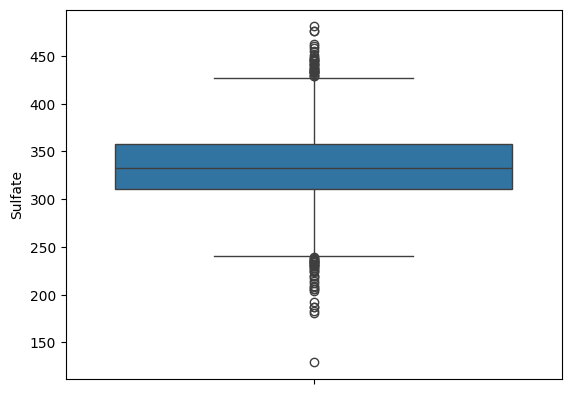

In [ ]:
sns.boxplot(y=data4['Sulfate'])

<Axes: ylabel='Sulfate'>

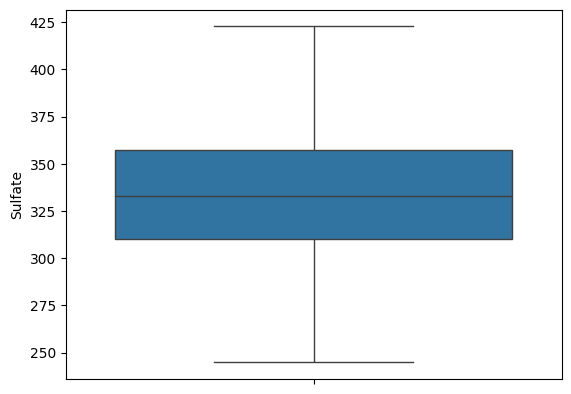

In [ ]:
data5['Sulfate'] = winsorize(data5['Sulfate'], limits = [0.015, 0.015])
sns.boxplot(y=data5['Sulfate'])

<Axes: ylabel='Organic_carbon'>

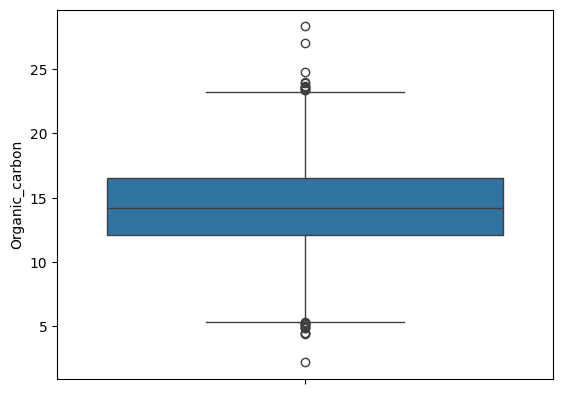

In [ ]:
sns.boxplot(y=data4['Organic_carbon'])

<Axes: ylabel='Organic_carbon'>

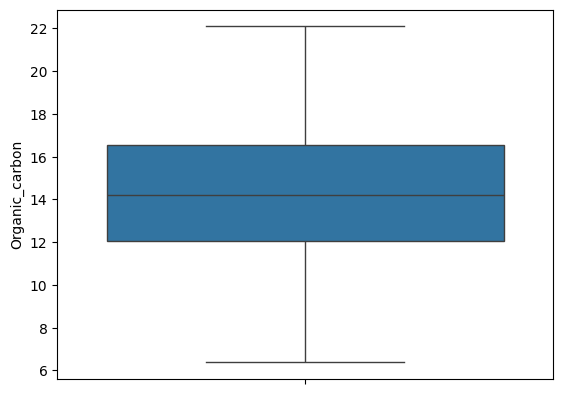

In [ ]:
data5['Organic_carbon'] = winsorize(data5['Organic_carbon'], limits = [0.01, 0.01])
sns.boxplot(y=data5['Organic_carbon'])

<Axes: ylabel='Trihalomethanes'>

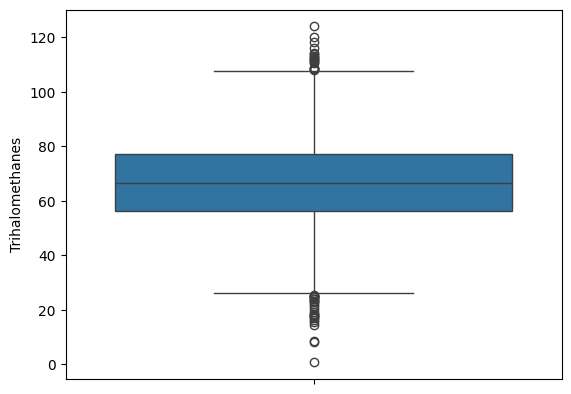

In [ ]:
sns.boxplot(y=data4['Trihalomethanes'])

<Axes: ylabel='Trihalomethanes'>

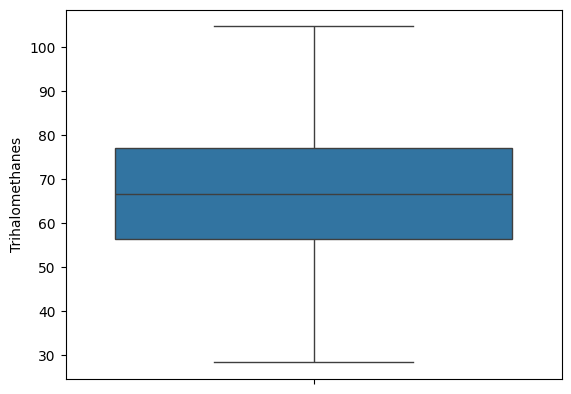

In [ ]:
data5['Trihalomethanes'] = winsorize(data5['Trihalomethanes'], limits = [0.01, 0.01])
sns.boxplot(y=data5['Trihalomethanes'])

<Axes: ylabel='Turbidity'>

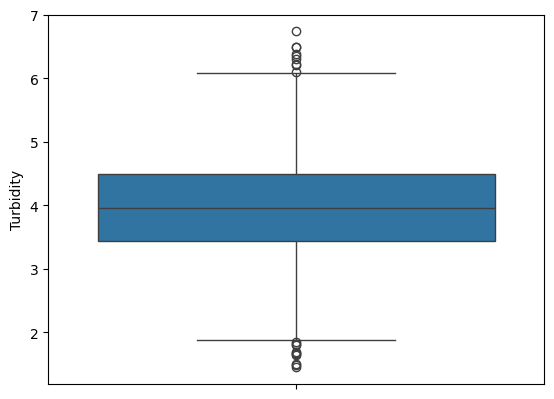

In [ ]:
sns.boxplot(y=data4['Turbidity'])

<Axes: ylabel='Turbidity'>

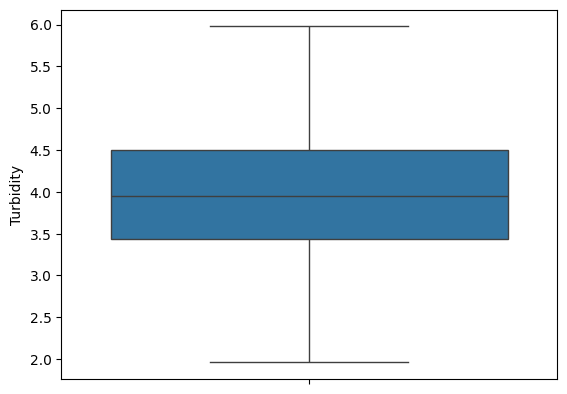

In [ ]:
data5['Turbidity'] = winsorize(data5['Turbidity'], limits = [0.005, 0.005])
sns.boxplot(y=data5['Turbidity'])

<Axes: ylabel='Check'>

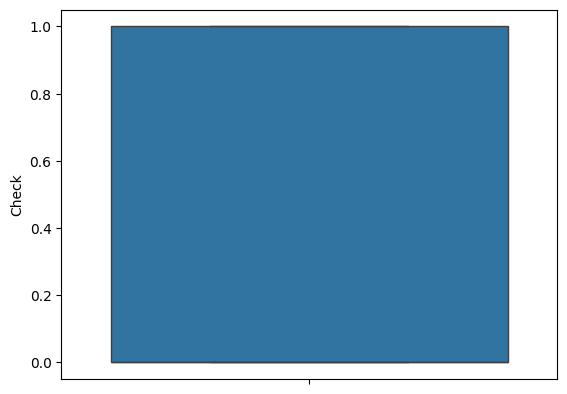

In [ ]:
sns.boxplot(y=data4['Check'])

**Correlation**

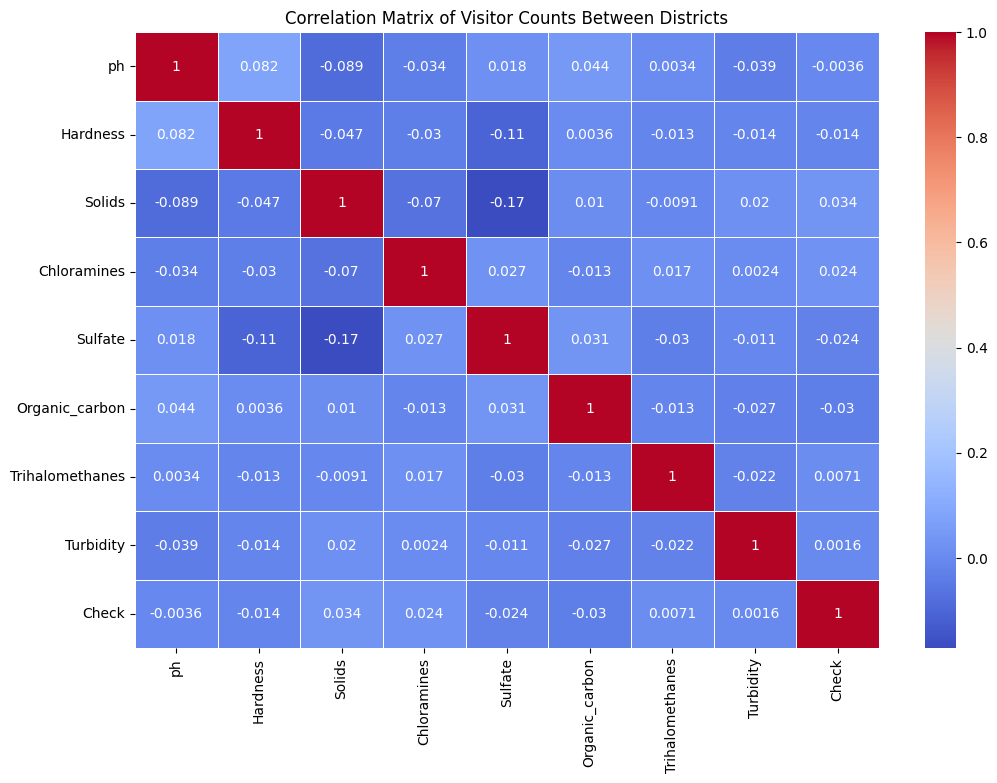

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Visitor Counts Between Districts')
plt.show()

**Splitting Training and Testing Data**

In [ ]:
x=np.array(data5[['ph','Hardness','Solids','Chloramines','Sulfate','Organic_carbon','Trihalomethanes','Turbidity']])
y=np.array(data5['Check'])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

X_train_scaled[:5],y_train[:5]

(array([[-0.00715745,  0.1955759 ,  0.0347529 , -0.13230603, -0.78023032,
         -0.1729579 , -0.14693013,  0.67917799],
        [-1.31607   ,  0.24864119,  0.05040752,  0.61009205, -0.51044404,
         -0.08734114,  1.06786298, -1.33541914],
        [ 0.19321587, -0.09487828,  0.55863548,  2.14888079, -0.66066911,
          0.69893522, -0.34744466, -0.37740914],
        [ 0.38805434,  0.94066325, -0.83589984,  0.563881  ,  0.60507896,
          0.2278868 , -0.67969089, -1.31743002],
        [ 0.02394303, -0.42741201,  1.09195464, -1.75278324, -0.48211624,
         -0.05893333,  0.68506079, -0.26511882]]),
 array([0., 0., 0., 1., 0.]))

**Passive Aggressive Classifier**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
model=PassiveAggressiveClassifier()
model.fit(x,y)
model.score(x_test,y_test)

0.38461538461538464

**Logistic Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()
model.fit(X_train_scaled,y_train)
model.score(X_test_scaled,y_test)

0.6227106227106227

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier()
rf2.fit(X_train_scaled,y_train)
rf2.score(X_test_scaled,y_test)

0.6874236874236874

**SVM Classifier**

In [ ]:
from sklearn.svm import SVC
svr_linear = SVC(C=1,gamma=0.1,kernel='rbf')
svr_linear.fit(X_train_scaled, y_train)
svr_linear.score(X_test_scaled, y_test)

0.6984126984126984

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 5)
KNN_classifier.fit(X_train_scaled, y_train)
KNN_classifier.score(X_test_scaled, y_test)
y_pred=KNN_classifier.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.63003663003663

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf.fit(X_train_scaled,y_train)
clf.score(X_test_scaled,y_test)

0.5775335775335775

**Prediction using SVC**

In [ ]:
svr_linear.predict([[8.316765884,214.3733941,22018.41744,8.059332377,356.8861356,18.4365245,100.3416744,4.628770537]])

array([1.])

In [ ]:
model = SVC()
model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = model.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.6984126984126984


In [ ]:
def predict_value(input_features):
    # input_features should be a list or array with the same number of features as your training data
    prediction = model.predict([input_features])
    return prediction[0]

# Example usage
new_data = [8.316765884,214.3733941,22018.41744,8.059332377,356.8861356,18.4365245,100.3416744,4.628770537]  # replace with actual feature values
predicted_value = predict_value(new_data)
print(f"Predicted value: {predicted_value}")

Predicted value: 1.0


In [ ]:
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1]
}

grid_search = GridSearchCV(SVC(), parameters, cv=5)
grid_search.fit(X_train_scaled, y_train)
print(f"Best parameters: {grid_search.best_params_}")

In [ ]:
best_svm_model = SVC(C=1, gamma=0.1, kernel='rbf')

# Train the model on the scaled training data
best_svm_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_best = best_svm_model.predict(X_test_scaled)

# Evaluate the performance
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best SVM Model Accuracy: {accuracy_best}")

Best SVM Model Accuracy: 0.6984126984126984


In [ ]:
confusion_best = confusion_matrix(y_test, y_pred_best)
print(f"Confusion Matrix:\n{confusion_best}")

Confusion Matrix:
[[475  35]
 [212  97]]


In [ ]:
from sklearn.metrics import classification_report

print(f"Classification Report:\n{classification_report(y_test, y_pred_best)}")

Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.93      0.79       510
         1.0       0.73      0.31      0.44       309

    accuracy                           0.70       819
   macro avg       0.71      0.62      0.62       819
weighted avg       0.71      0.70      0.66       819



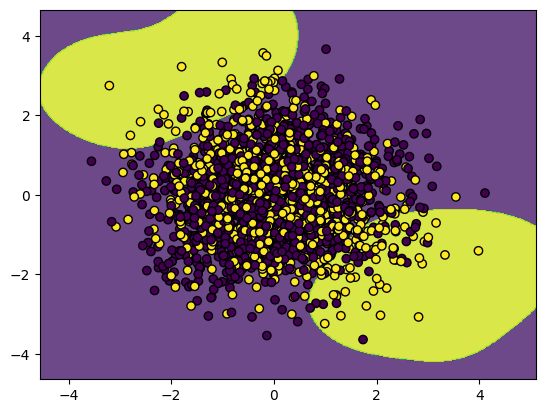

In [ ]:
from sklearn.decomposition import PCA

def plot_decision_boundary(model, X, y):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.show()

# Reduce to 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model.fit(X_train_pca, y_train)
plot_decision_boundary(model, X_train_pca, y_train)